In [14]:
"""
Flowchart YOLOv9 Model Inference and OCR Extraction Pipeline

This script performs the following tasks:

1. **Clean Up Directories**:
   - Removes contents of specified output directories (e.g., `ocr_output_json`, `flowchart_detections`, etc.) to prepare for the new inference and OCR extraction.

2. **YOLOv9 Model Inference**:
   - Loads a pre-trained YOLOv9 model from a specified checkpoint file (`best.pt`).
   - Selects a random sample of images from the test dataset.
   - Runs inference on the images using a configurable confidence threshold.
   - Draws bounding boxes and class labels on detected objects.

3. **OCR Extraction**:
   - Extracts OCR from specific bounding boxes (e.g., `activity`, `decision_node` classes).
   - Applies preprocessing to improve image quality for OCR (e.g., upscaling, sharpening, and converting to grayscale).
   - Uses Tesseract OCR to extract text from the selected bounding boxes.
   - Saves the OCR results in a structured JSON format with bounding box coordinates, class names, confidence scores, and the extracted text.

4. **Visualization**:
   - Saves the visualized images with bounding boxes and labels to a specified directory (`test_visualizations`).
   - The visualized images are saved with their respective class labels and confidence scores.

Requirements:
-------------
- Python 3.8+
- `ultralytics` package (YOLOv9)
- `Pillow` (for image processing)
- `pytesseract` (for OCR)
- `opencv-python` (for image manipulation)
- YOLOv9 model checkpoint (`best.pt`)
- Test images in YOLO-compatible format

Usage:
------
1. Adjust paths to the YOLOv9 model, test images directory, and output directories (`ocr_output_json`, `test_visualizations`).
2. Run the script to perform inference on the sample images, extract OCR text from relevant bounding boxes, and store the results in JSON files.
3. Visualize the results with bounding boxes drawn on the images and review the OCR output saved in the JSON files.

Outputs:
--------
- Visualized images with bounding boxes and class labels are saved in `test_visualizations`.
- OCR results are saved as JSON files in the `ocr_output_json` directory. Each JSON file corresponds to an image and contains the bounding box coordinates, class, confidence, and extracted text.

Caution:
--------
- Ensure that directories specified for cleaning up exist before running the cleanup step.
- Review the OCR results to check if the text extraction quality is satisfactory; this may depend on image quality, bounding box accuracy, and OCR preprocessing.
"""


'\nFlowchart YOLOv9 Model Inference and OCR Extraction Pipeline\n\nThis script performs the following tasks:\n\n1. **Clean Up Directories**:\n   - Removes contents of specified output directories (e.g., `ocr_output_json`, `flowchart_detections`, etc.) to prepare for the new inference and OCR extraction.\n\n2. **YOLOv9 Model Inference**:\n   - Loads a pre-trained YOLOv9 model from a specified checkpoint file (`best.pt`).\n   - Selects a random sample of images from the test dataset.\n   - Runs inference on the images using a configurable confidence threshold.\n   - Draws bounding boxes and class labels on detected objects.\n\n3. **OCR Extraction**:\n   - Extracts OCR from specific bounding boxes (e.g., `activity`, `decision_node` classes).\n   - Applies preprocessing to improve image quality for OCR (e.g., upscaling, sharpening, and converting to grayscale).\n   - Uses Tesseract OCR to extract text from the selected bounding boxes.\n   - Saves the OCR results in a structured JSON format

# About This Notebook

-Clean Up Directories: The cleanup function deletes contents from the specified output directories (ocr_output_json, flowchart_detections, etc.) before running new inference and OCR.

-Loading and Configuring YOLOv9 Model: The script loads the trained YOLOv9 model and sets the necessary configuration for the inference task (e.g., model path, test images directory, etc.).

-OCR Extraction: It processes images, extracts OCR text from the specified classes (activity, decision_node), applies optional preprocessing (such as sharpening and resizing), and stores the results in a structured JSON format.

-Inference and Visualizations: The script performs inference on a random sample of test images, draws bounding boxes for all detected objects (only shows bounding boxes for activity and decision_node classes), and visualizes them by saving the results as images

In [15]:
import shutil
import os

# Function to clean up files in the specified directory
def clean_up_ocr_dir(directory):
    """
    Removes all files in the given directory (including subdirectories).

    Arguments:
        directory (str): Directory path to clean.
    """
    if os.path.exists(directory):
        # Remove all files and subdirectories
        shutil.rmtree(directory)
        print(f"Cleaned up the directory: {directory}")
    else:
        print(f"Directory not found: {directory}")

# Path to the processed OCR directory
ocr_dir = 'ocr_output_json'

# Clean up the processed OCR directory
clean_up_ocr_dir(ocr_dir)


Cleaned up the directory: ocr_output_json


# Clean Up the Directories Before Running

In [16]:
# === Consolidated cleanup for OCR and detection output directories ===

import os
import shutil

def clean_output_dirs(directories):
    """
    Remove all files and subdirectories inside the specified list of directories.

    Parameters:
    -----------
    directories : list of str
        List of folder paths to be cleaned. The folder itself is preserved, only contents are deleted.
    """
    for directory in directories:
        if os.path.exists(directory):
            for fname in os.listdir(directory):
                file_path = os.path.join(directory, fname)
                try:
                    if os.path.isfile(file_path) or os.path.islink(file_path):
                        os.remove(file_path)
                    elif os.path.isdir(file_path):
                        shutil.rmtree(file_path)
                    print(f"Deleted: {file_path}")
                except Exception as e:
                    print(f"Failed to delete {file_path}. Reason: {e}")
        else:
            print(f"Directory not found: {directory}")

# Example usage
clean_output_dirs(["ocr_output_json", "flowchart_detections","ocr_output_json","ocr_output_visuals","test_visualizations"])


Directory not found: ocr_output_json
Directory not found: flowchart_detections
Directory not found: ocr_output_json
Directory not found: ocr_output_visuals
Deleted: test_visualizations/vis_233_png.rf.59e7c3ec4964e5f0efc437b9fcf292a1.jpg
Deleted: test_visualizations/vis_139_jpeg_jpg.rf.2fe316d1fadf4e2bae7907cb1a4a9e73.jpg
Deleted: test_visualizations/vis_133_png.rf.2c5fd910d3d8f56b9cd88aac87b4114e.jpg
Deleted: test_visualizations/vis_7_png.rf.fdc537e31f5d6bd51d328a23e80fcb17.jpg
Deleted: test_visualizations/vis_146_png_jpg.rf.54f348cb529d88913237b427ff4c2836.jpg
Deleted: test_visualizations/vis_232_png.rf.55232692b0f8a19ab44965ede3d121d5.jpg
Deleted: test_visualizations/vis_77_png.rf.3aa97193e8d23082a64ed4fa646f6e45.jpg
Deleted: test_visualizations/vis_199_png_jpg.rf.515cd087ef2d5141a9a8d4ec820c7fd0.jpg
Deleted: test_visualizations/vis_60_png_jpg.rf.c9654db0c1f2ace74aca21c9fc683ce8.jpg
Deleted: test_visualizations/vis_31_png.rf.47b81ff72feabc0961420c6142843f89.jpg
Deleted: test_visualiz

# Import Libraries

In [17]:
import os
import random
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import pytesseract
import cv2
import numpy as np
import json


# Configuration

In [18]:
# --- Configuration ---
model_path = "/sfs/ceph/standard/sds_managed_sadewole/DS6050_SP25/group6/kaggle/runs/train_test/flowchart-test/weights/best.pt"
test_images_dir = "/sfs/ceph/standard/sds_managed_sadewole/DS6050_SP25/group6/kaggle/kaggle_flowchart_yolo/images/test"
output_dir = "test_visualizations"
ocr_output_dir = "ocr_output_json"  # Directory to store OCR results in JSON format
conf_threshold = 0.25  # Confidence threshold for filtering detections

# Create output directories if they don't exist
os.makedirs(output_dir, exist_ok=True)
os.makedirs(ocr_output_dir, exist_ok=True)


# Define the classes for OCR Extraction
We only find text in activities and decision nodes so restrict OCR extraction

In [19]:
# Define valid OCR classes for text extraction
valid_ocr_classes = {"activity", "decision_node"}

In [20]:
# Load the trained YOLO model
model = YOLO(model_path)

In [21]:
# Get all image files in the test directory
all_images = [f for f in os.listdir(test_images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

#define number of images to run from test set
sample_images = random.sample(all_images, 2)

#use this when you are only working on a sample of pre-processed files in the test files.
#sample_images = all_images

# Extract OCR
stores all the OCR linked to bounding boxes in a single json file

In [22]:
import os
import json
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
from ultralytics import YOLO


# Function to extract OCR and store results in a single JSON file
def extract_ocr_all_images(image_files, results, ocr_output_path, test_images_dir):
    """
    Perform OCR extraction for relevant bounding boxes in all images and save the results to a single JSON file.
    
    Arguments:
        image_files (list of str): The list of image filenames being processed.
        results (list of ultralytics.yolo.engine.results.Detection): The inference results containing bounding boxes and classes for each image.
        ocr_output_path (str): Path where all OCR results are saved as a single JSON file.
        test_images_dir (str): The directory where test images are located.
    """
    # Initialize a list to store OCR data for all images
    all_ocr_data = []

    for img_file, result in zip(image_files, results):
        # Open the original image
        image = Image.open(os.path.join(test_images_dir, img_file)).convert("RGB")
        
        # Initialize list to store OCR data for this image
        ocr_data = []
        
        # Iterate over all bounding boxes from inference results
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)  # Convert to Python int
            conf = float(box.conf[0].cpu().numpy())
            cls_id = int(box.cls[0].cpu().numpy())
            cls_name = result.names[cls_id]
            
            # Only extract OCR for 'activity' class (or whatever class corresponds to process steps)
            if cls_name == "activity":  # Modify this line if you use a different label for process steps
                # Crop the image to the bounding box
                cropped = image.crop((x1, y1, x2, y2))

                # Optional Pre-processing step (e.g., upscaling or sharpening)
                cropped = cropped.resize((cropped.width * 2, cropped.height * 2), Image.Resampling.LANCZOS)
                cropped = cropped.convert("L")  # Convert to grayscale (if needed)
                
                # Enhance sharpness to improve text quality for OCR
                enhancer = ImageEnhance.Sharpness(cropped)
                cropped = enhancer.enhance(2.0)  # Increase sharpness
                
                # Apply OCR to the cropped image
                text = pytesseract.image_to_string(cropped, config="--psm 6").strip()

                # Append OCR result with bounding box and class
                ocr_data.append({
                    "image": img_file,  # Store the image name for reference
                    "bbox": [int(x1), int(y1), int(x2), int(y2)],  # Convert to Python int
                    "class": cls_name,
                    "confidence": conf,
                    "text": text
                })

                # Debug: print OCR results for this box
                print(f"Detected class: {cls_name}, Confidence: {conf:.2f}")
                print(f"Processing OCR for {cls_name} box: ({x1}, {y1}, {x2}, {y2})")
                print(f" - OCR result: '{text}'")
        
        # Add the OCR data for this image to the overall collection
        all_ocr_data.extend(ocr_data)

    # Save all OCR results to a single JSON file
    with open(ocr_output_path, 'w') as f:
        json.dump(all_ocr_data, f, indent=2)
    print(f"Saved all OCR results to: {ocr_output_path}")

# Run inference, OCR extraction, and save results in a single file
results = []  # List to store results for each image

for img_file in sample_images:
    img_path = os.path.join(test_images_dir, img_file)
    results.append(model(img_path, conf=conf_threshold)[0])

# Specify the output path where all OCR results will be saved
ocr_output_path = "ocr_output_json/ocr_all_images.json"

# Perform OCR extraction for all images and save in a single JSON file
extract_ocr_all_images(sample_images, results, ocr_output_path, test_images_dir)



image 1/1 /sfs/ceph/standard/sds_managed_sadewole/DS6050_SP25/group6/kaggle/kaggle_flowchart_yolo/images/test/256_png.rf.2d34617941a0c32424cbe06878dafd4a.jpg: 640x640 7 activitys, 12 control_flows, 4 decision_nodes, 1 start_node, 2 texts, 15.8ms
Speed: 1.4ms preprocess, 15.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /sfs/ceph/standard/sds_managed_sadewole/DS6050_SP25/group6/kaggle/kaggle_flowchart_yolo/images/test/234_png.rf.1e1e5d96aa96fdfeb9ab67dbf804275f.jpg: 640x640 5 actions, 3 activitys, 10 control_flows, 1 final_node, 1 fork, 2 merges, 1 start_node, 15.4ms
Speed: 1.3ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detected class: activity, Confidence: 0.93
Processing OCR for activity box: (162, 567, 310, 635)
 - OCR result: ''
Detected class: activity, Confidence: 0.93
Processing OCR for activity box: (343, 94, 490, 165)
 - OCR result: ''
Detected class: activity, Confidence: 0.91
Processing OCR for activ

# Run Inference and Draw Bounding Boxes
store these files in test_visualizations

In [23]:
#Run inference and draw bounding boxes
for img_file in sample_images:
    img_path = os.path.join(test_images_dir, img_file)
    results = model(img_path, conf=conf_threshold)[0]

    # Open image using PIL
    image = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(image)

    # Load font (fallback if needed)
    try:
        font = ImageFont.truetype("arial.ttf", 14)
    except:
        font = ImageFont.load_default()

    # Draw bounding boxes and labels
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cls_id = int(box.cls[0].cpu().numpy())
        conf = float(box.conf[0].cpu().numpy())
        cls_name = results.names[cls_id]

        # Draw the bounding box
        draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
        
        # Draw the label with confidence
        label = f"{cls_name} {conf:.2f}"
        draw.text((x1, max(0, y1 - 12)), label, fill="black", font=font)

    # Save the visualized image in the 'test_visualizations' folder
    output_path = os.path.join(output_dir, f"vis_{img_file}")
    image.save(output_path)
    print(f"Saved: {output_path}")


image 1/1 /sfs/ceph/standard/sds_managed_sadewole/DS6050_SP25/group6/kaggle/kaggle_flowchart_yolo/images/test/256_png.rf.2d34617941a0c32424cbe06878dafd4a.jpg: 640x640 7 activitys, 12 control_flows, 4 decision_nodes, 1 start_node, 2 texts, 15.9ms
Speed: 1.5ms preprocess, 15.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Saved: test_visualizations/vis_256_png.rf.2d34617941a0c32424cbe06878dafd4a.jpg

image 1/1 /sfs/ceph/standard/sds_managed_sadewole/DS6050_SP25/group6/kaggle/kaggle_flowchart_yolo/images/test/234_png.rf.1e1e5d96aa96fdfeb9ab67dbf804275f.jpg: 640x640 5 actions, 3 activitys, 10 control_flows, 1 final_node, 1 fork, 2 merges, 1 start_node, 15.6ms
Speed: 1.3ms preprocess, 15.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Saved: test_visualizations/vis_234_png.rf.1e1e5d96aa96fdfeb9ab67dbf804275f.jpg


# Display Results Side By Side

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to display original image and the annotated image side by side
def display_comparison(original_img_path, annotated_img_path):
    """
    Display the original image and the annotated image side by side for comparison.
    
    Parameters:
    -----------
    original_img_path : str
        Path to the original unmodified image.
    annotated_img_path : str
        Path to the annotated image with bounding boxes drawn.
    """
    # Load original image
    original_image = Image.open(original_img_path).convert("RGB")
    
    # Load annotated image (inference result with bounding boxes)
    annotated_image = Image.open(annotated_img_path).convert("RGB")
    
    # Create a figure to display the two images side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Show the original image
    axs[0].imshow(original_image)
    axs[0].set_title("Original Image (Pre-Processed)")
    axs[0].axis('off')  # Hide axes
    
    # Show the annotated image with bounding boxes
    axs[1].imshow(annotated_image)
    axs[1].set_title("Annotated Image (With Bounding Boxes)")
    axs[1].axis('off')  # Hide axes
    
    # Display the images
    plt.tight_layout()
    plt.show()


# Display side by side comparison for sample images

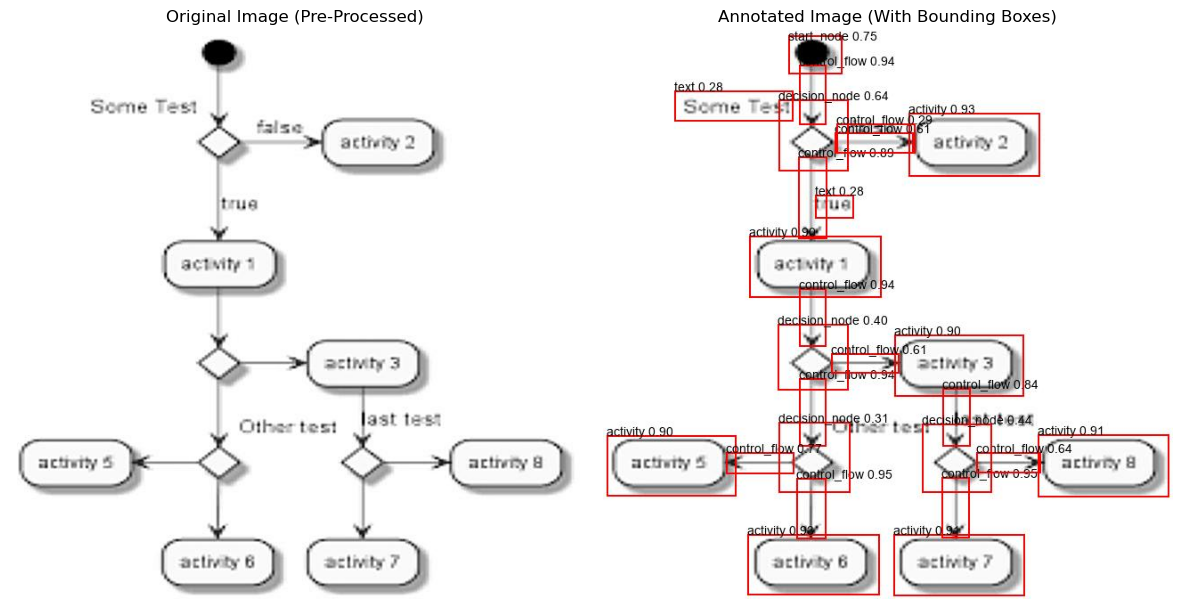

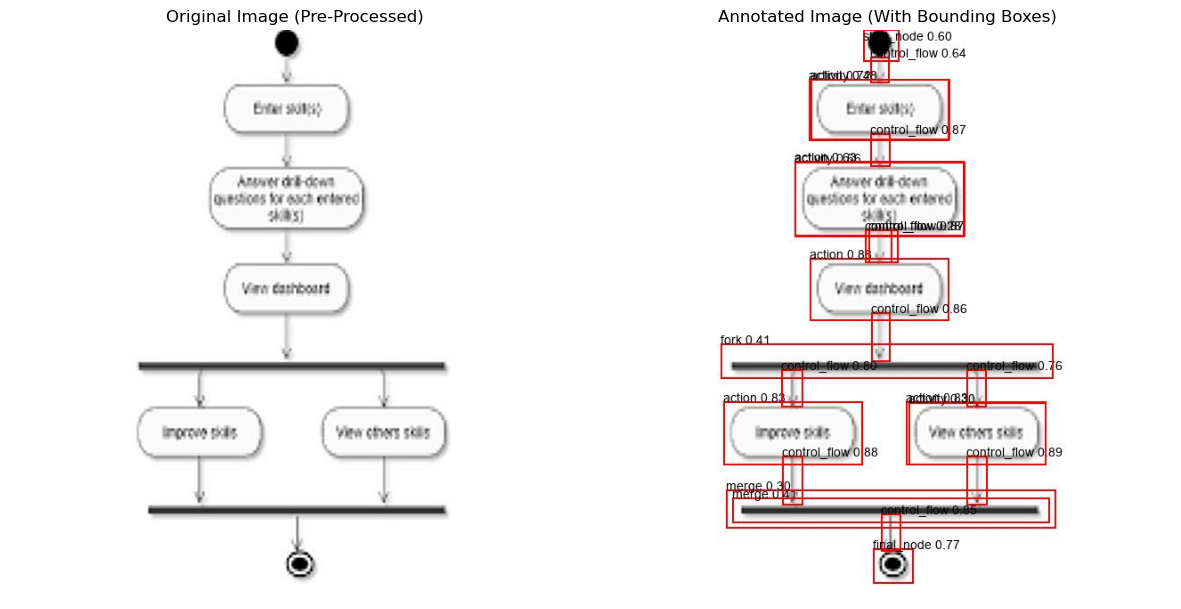

In [25]:
# Iterate over sample images
for img_file in sample_images:

    # Path to the original image
    original_img_path = os.path.join(test_images_dir, img_file)  

    # Path to the annotated image (from inference results)
    annotated_img_path = os.path.join(output_dir, f"vis_{img_file}")  

    # Display comparison side by side
    display_comparison(original_img_path, annotated_img_path)
